In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy

In [179]:
data = pd.read_csv("https://raw.githubusercontent.com/Solveritas/AVR-DZ1/main/dataset_N1.csv",";")

C:\Users\Crivc\AppData\Local\Temp\ipykernel_25292\475751479.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data = pd.read_csv("https://raw.githubusercontent.com/Solveritas/AVR-DZ1/main/dataset_N1.csv",";")


In [180]:
data.head()

,DateTime,Смертей за день,Заражений за день,Выздоровлений за день
0,2020-01-22 00:00:00,17,557,30.0
1,2020-01-23 00:00:00,1,100,2.0
2,2020-01-24 00:00:00,8,287,7.0
3,2020-01-25 00:00:00,16,493,3.0
4,2020-01-26 00:00:00,14,683,14.0


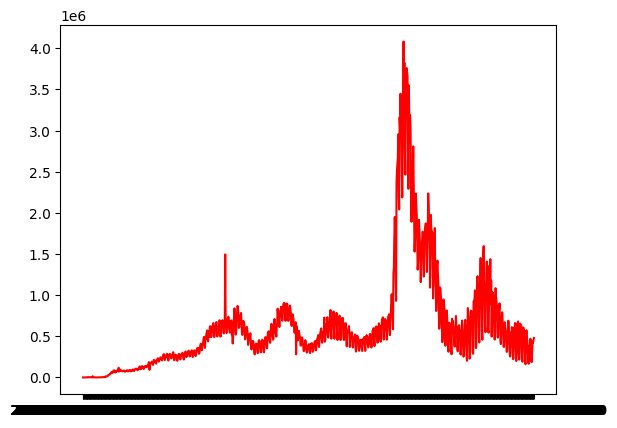

In [202]:
data_cut = data[:]

plt.plot(data_cut['DateTime'], data_cut['Заражений за день'], 'r')

In [203]:
spectra = np.fft.fft(data_cut['Заражений за день'])

a = (spectra.real**2 + spectra.imag**2)**(1/2)

theta = np.angle(spectra)

### **Фурье**

Text(0.5, 1.0, 'Прирост по дням')

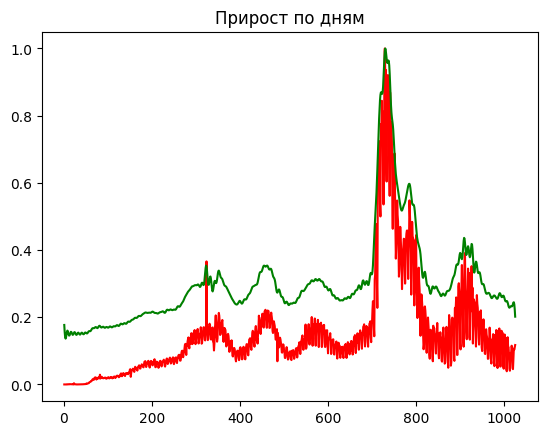

In [204]:
new_x = range(1,len(data_cut['DateTime'])+1)
new_y = np.zeros(data_cut['Заражений за день'].shape)

fd = 1 / np.mean(np.diff(new_x))

for i in range(int(len(new_y) / 8)):
    new_y += np.cos(2 * np.pi * fd/len(new_y) * i * new_x  + theta[i]) * a[i]
    
plt.plot(new_x, data_cut['Заражений за день']/max( data_cut['Заражений за день']), 'r')
plt.plot(new_x,new_y/max(new_y), 'g')
plt.title("Прирост по дням")

In [205]:
fd

1.0

In [206]:
data_cut['Заражений за день']

0          557
1          100
2          287
3          493
4          683
         ...  
1020    324713
1021    435570
1022    422818
1023    453968
1024    479528
Name: Заражений за день, Length: 1025, dtype: int64

### **Полином**

C:\Users\Crivc\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Прирост по дням')

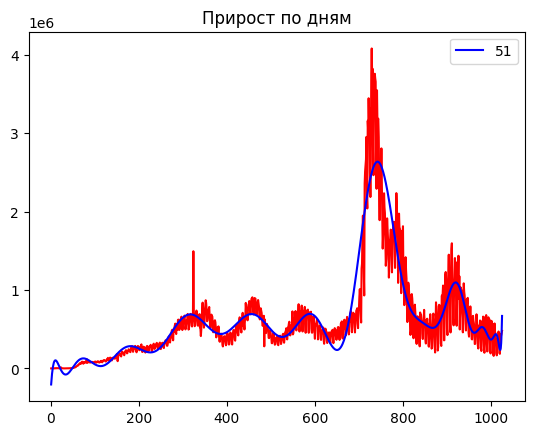

In [212]:
plt.plot(new_x, data_cut['Заражений за день'], 'r')

for deg in [51]:
    z = np.polyfit(new_x, data_cut['Заражений за день'], deg)
    p = np.poly1d(z)
    new_y = p(new_x)
    plt.plot(new_x, new_y, 'b', label=deg)
    
plt.legend()
plt.title("Прирост по дням")

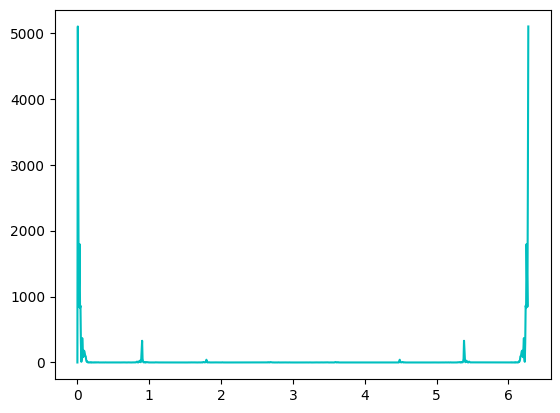

In [214]:
dat = data_cut['Заражений за день'] - np.mean(data_cut['Заражений за день'])
dat = dat / np.max(dat)

spectra = np.fft.fft(dat)

dens = np.abs(spectra)**2

f = np.asarray([2*np.pi * fd/len(dat) * i for i in range(int(len(dat)))])

plt.plot(f, dens, 'c')

### **Выделение пика**

(0.8, 1.0)

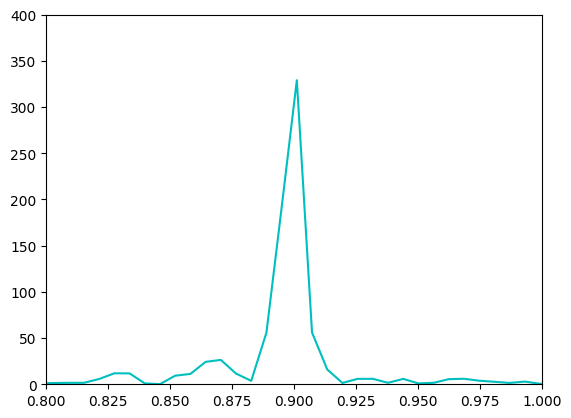

In [215]:
plt.plot(f,dens, 'c')
plt.ylim(0,400)
plt.xlim(0.8,1)

In [189]:
deriv = np.polyder(p)

deriv2 = np.polyder(deriv)

In [190]:
deriv

poly1d([-7.49861438e-137,  2.55651471e-133, -1.30469868e-130,
       -2.24057358e-127, -3.45678134e-125,  1.71964265e-121,
        2.17464233e-118,  9.32244321e-116, -9.42458707e-113,
       -2.17920261e-109, -2.06269183e-106, -7.22713873e-104,
        1.04607375e-100,  2.25914800e-097,  2.25971546e-094,
        1.03989263e-091, -7.66738987e-089, -2.20575761e-085,
       -2.49077277e-082, -1.42335601e-079,  4.62075574e-077,
        2.13687991e-073,  2.61715490e-070,  1.54664834e-067,
       -5.06778825e-065, -2.28619143e-061, -2.57618565e-058,
       -1.06367253e-055,  1.26643163e-052,  2.64864294e-049,
        1.84891032e-046, -6.06539637e-044, -2.50769216e-040,
       -1.82960104e-037,  9.07942675e-035,  2.52327251e-031,
        7.00424163e-029, -2.15733903e-025, -1.30580772e-022,
        2.02696742e-019,  7.87249577e-017, -2.39746198e-013,
        1.78447606e-010, -7.34996855e-008,  1.90743143e-005,
       -3.21958543e-003,  3.49986834e-001, -2.34705699e+001,
        8.90897792e+002

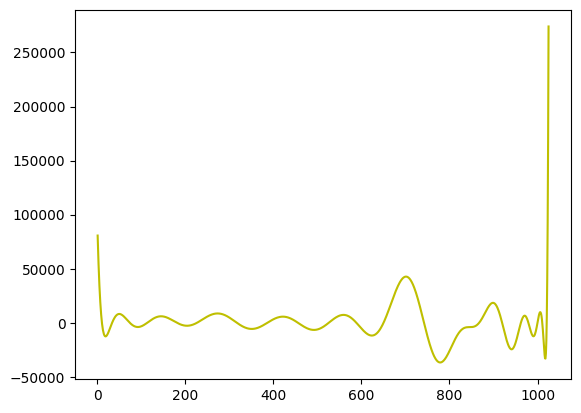

In [219]:
new_y = deriv(new_x)

plt.plot(new_x, new_y, label=deg, color='y')

In [220]:
roots=np.roots(deriv)
roots

array([ 1698.43646794   +0.j        , -1006.39816858   +0.j        ,
        -995.1173154  +150.64832531j,  -995.1173154  -150.64832531j,
        -961.4536262  +298.18357072j,  -961.4536262  -298.18357072j,
        -905.92017509 +439.53813041j,  -905.92017509 -439.53813041j,
        -829.39986123 +571.68362539j,  -829.39986123 -571.68362539j,
        -733.05570973 +691.69162717j,  -733.05570973 -691.69162717j,
        -618.38455944 +796.73166562j,  -618.38455944 -796.73166562j,
        -487.13174844 +884.06448425j,  -487.13174844 -884.06448425j,
        -341.2555335  +951.02036634j,  -341.2555335  -951.02036634j,
        -182.85972814 +994.93318413j,  -182.85972814 -994.93318413j,
         -14.02999607+1012.93993532j,   -14.02999607-1012.93993532j,
         163.41965385+1001.54786463j,   163.41965385-1001.54786463j,
         348.77438174 +955.30441892j,   348.77438174 -955.30441892j,
         545.91240921 +861.52423958j,   545.91240921 -861.52423958j,
        1020.78210011   +0.j      

In [221]:
real_valued = roots.real[abs(roots.imag)==0]

extremums = real_valued[real_valued>0]

indexes = np.array([index for index,value in enumerate(roots) if (value.imag == 0)*(value.real>0)])

In [222]:
deriv2

poly1d([-3.74930719e-135,  1.25269221e-131, -6.26255366e-129,
       -1.05306958e-125, -1.59011942e-123,  7.73839194e-120,
        9.56842623e-117,  4.00865058e-114, -3.95832657e-111,
       -8.93473070e-108, -8.25076733e-105, -2.81858410e-102,
        3.97508027e-099,  8.35884761e-096,  8.13497567e-093,
        3.63962420e-090, -2.60691256e-087, -7.27900011e-084,
       -7.97047287e-081, -4.41240363e-078,  1.38622672e-075,
        6.19695174e-072,  7.32803372e-069,  4.17595053e-066,
       -1.31762494e-063, -5.71547858e-060, -6.18284555e-057,
       -2.44644681e-054,  2.78614959e-051,  5.56215017e-048,
        3.69782065e-045, -1.15242531e-042, -4.51384589e-039,
       -3.11032177e-036,  1.45270828e-033,  3.78490877e-030,
        9.80593828e-028, -2.80454073e-024, -1.56696926e-021,
        2.22966416e-018,  7.87249577e-016, -2.15771578e-012,
        1.42758084e-009, -5.14497799e-007,  1.14445886e-004,
       -1.60979272e-002,  1.39994734e+000, -7.04117097e+001,
        1.78179558e+003

In [223]:
indexes2 = np.array([index for index,value in enumerate(deriv2) if value>0])

In [224]:
answer=np.array(extremums[np.array([index for index,value in enumerate(np.in1d(indexes,indexes2)) if value==True])],dtype=int)

In [225]:
answer

array([1020, 1010,  999,  867,  588,  525,  386,  226,  113,   33])

### **Пики**

In [226]:
data_cut['DateTime'][answer]

1020    2022-11-07 00:00:00
1010    2022-10-28 00:00:00
999     2022-10-17 00:00:00
867     2022-06-07 00:00:00
588     2021-09-01 00:00:00
525     2021-06-30 00:00:00
386     2021-02-11 00:00:00
226     2020-09-04 00:00:00
113     2020-05-14 00:00:00
33      2020-02-24 00:00:00
Name: DateTime, dtype: object

### **Если сравнивать с изначальным графиком с сайта и его пиками, то всё хорошо подходит**